# Лабораторная работа №1. Лобанов Дмитрий ИУ5-25М
### Цель работы
Изучение различных методов визуализация данных и создание истории на основе данных.
### Задание
* Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь.

Для лабораторных работ не рекомендуется выбирать датасеты очень большого размера.
* Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
1) История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
2) На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
3) Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
4) Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
5) История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.

## Ход работы

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "heart.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "johnsmith88/heart-disease-dataset",
  file_path,
)
df.shape

(1025, 14)

##Пол пациента и вероятность заболевания (график №1)

Этот график показывает распределение, но не очень наглядно демонстрирует доли каждой категории в общем объеме продаж.

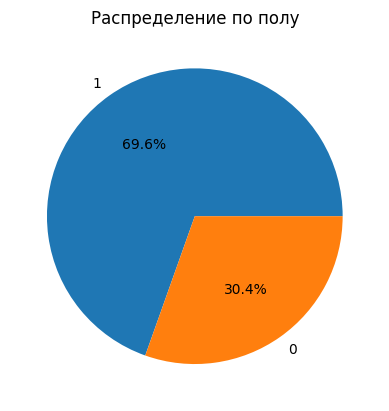

In [3]:
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Распределение по полу')
plt.ylabel('')
plt.show()


 Круговая диаграмма неудачна — сложно сравнить доли, особенно при небольших отличиях. Согласно Data-to-Viz, её следует избегать в пользу barplot.

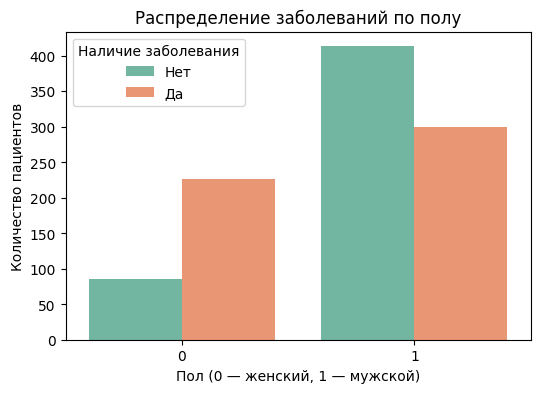

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sex', hue='target', palette='Set2')
plt.title('Распределение заболеваний по полу')
plt.xlabel('Пол (0 — женский, 1 — мужской)')
plt.ylabel('Количество пациентов')
plt.legend(title='Наличие заболевания', labels=['Нет', 'Да'])
plt.show()

Хотя в выборке мужчин больше, и они чаще болеют в абсолютных числах, женщины в большей степени подвержены заболеванию в своей группе. То есть вероятность заболевания среди женщин выше.

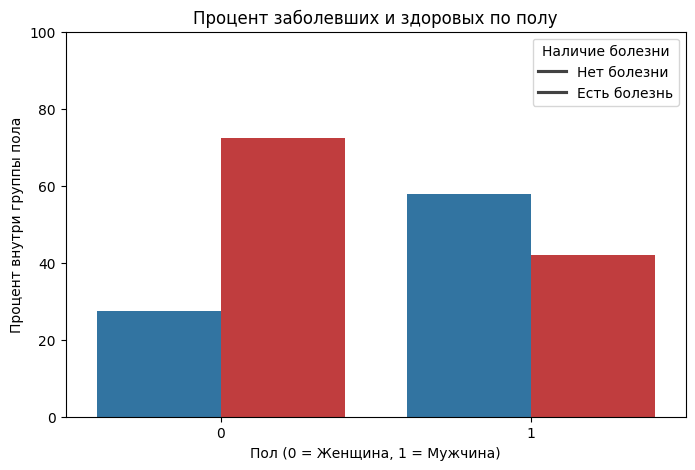

In [26]:
df_copy = df.copy()

# Группируем по полу и наличию болезни, считаем количество
grouped = df_copy.groupby(['sex', 'target']).size().reset_index(name='count')

# Для каждого пола считаем общее количество
total_per_sex = grouped.groupby('sex')['count'].transform('sum')

# Добавляем столбец с долей
grouped['percentage'] = grouped['count'] / total_per_sex * 100

# Строим график
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='sex', y='percentage', hue='target', palette={0: 'tab:blue', 1: 'tab:red'})

# Подписи
plt.title('Процент заболевших и здоровых по полу')
plt.xlabel('Пол (0 = Женщина, 1 = Мужчина)')
plt.ylabel('Процент внутри группы пола')
plt.legend(title='Наличие болезни', labels=['Нет болезни', 'Есть болезнь'])
plt.ylim(0, 100)

plt.show()


Несмотря на то что мужчин в выборке больше, доля заболевших среди женщин выше. Примерно 70% женщин имеют диагноз сердечного заболевания, в то время как среди мужчин — менее половины. Это говорит о том, что женщины в данной выборке подвержены заболеванию в большей степени

## Холестерин и болезнь сердца (график №2)


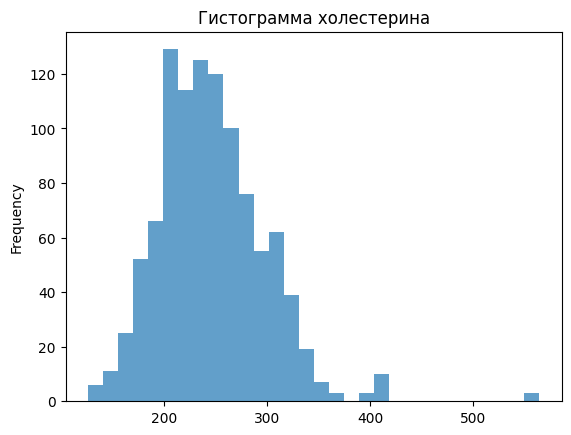

In [5]:
df['chol'].plot(kind='hist', bins=30, alpha=0.7)
plt.title('Гистограмма холестерина')
plt.show()

Гистограмма — сложно понять связь с диагнозом

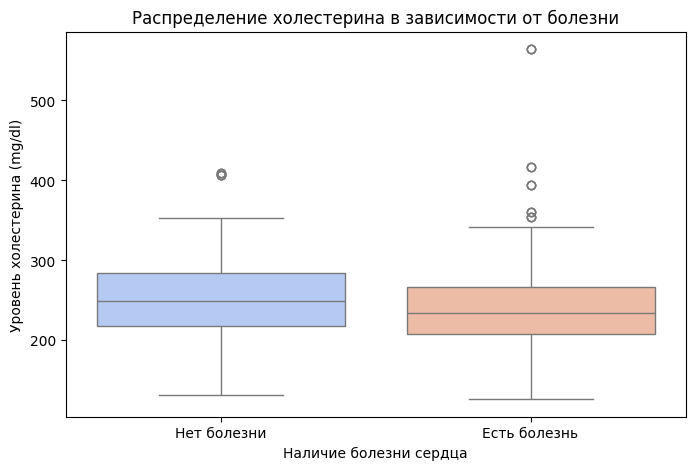

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='target', y='chol', palette='coolwarm')
plt.title('Распределение холестерина в зависимости от болезни')
plt.xlabel('Наличие болезни сердца')
plt.ylabel('Уровень холестерина (mg/dl)')
plt.xticks([0, 1], ['Нет болезни', 'Есть болезнь'])
plt.show()

Хотя значения холестерина перекрываются, пациенты без заболеваний имеют больше выбросов и чуть выше медиану.

## Возраст и заболевание (график №3)


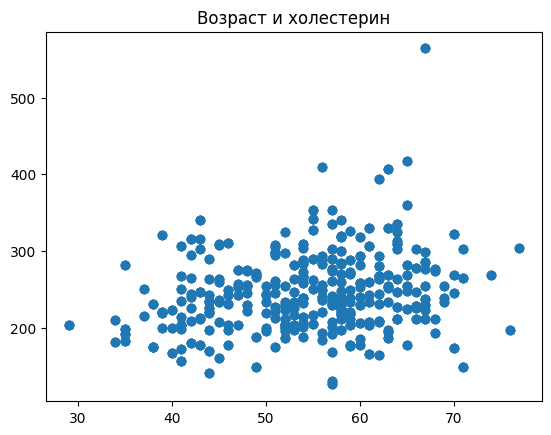

In [7]:
# Разброс точек без цвета — сложно воспринимается
plt.scatter(df['age'], df['chol'])
plt.title('Возраст и холестерин')
plt.show()

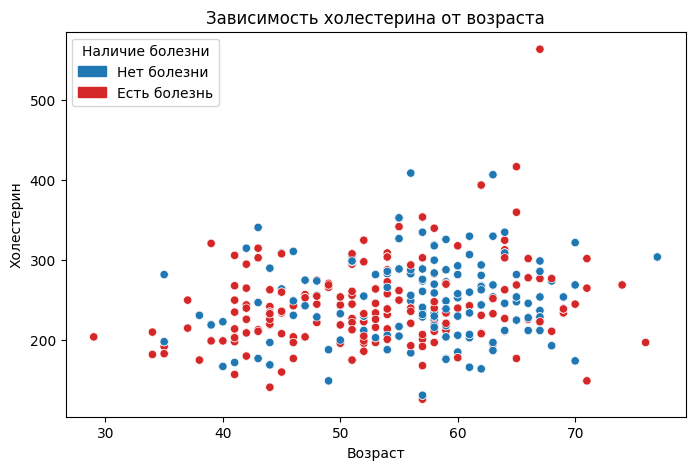

In [25]:
palette = {0: 'tab:blue', 1: 'tab:red'}
plt.figure(figsize=(8,5))
scatter = sns.scatterplot(data=df, x='age', y='chol', hue='target', palette=palette)
scatter.legend_.remove()
import matplotlib.patches as mpatches
legend_labels = ['Нет болезни', 'Есть болезнь']
legend_colors = ['tab:blue', 'tab:red']
handles = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=handles, title='Наличие болезни')
plt.title('Зависимость холестерина от возраста')
plt.xlabel('Возраст')
plt.ylabel('Холестерин')

plt.show()

Заметно, что в основном больные заметны в возрасте до 55

## Частота сердцебиения и диагноз (график №4)


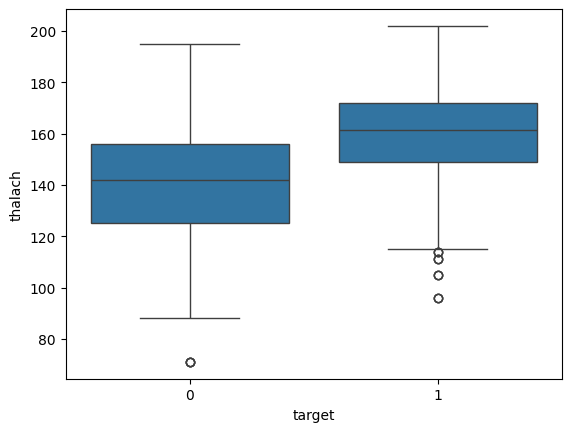

In [9]:
# Плохой boxplot с большим шумом
sns.boxplot(x='target', y='thalach', data=df)
plt.show()

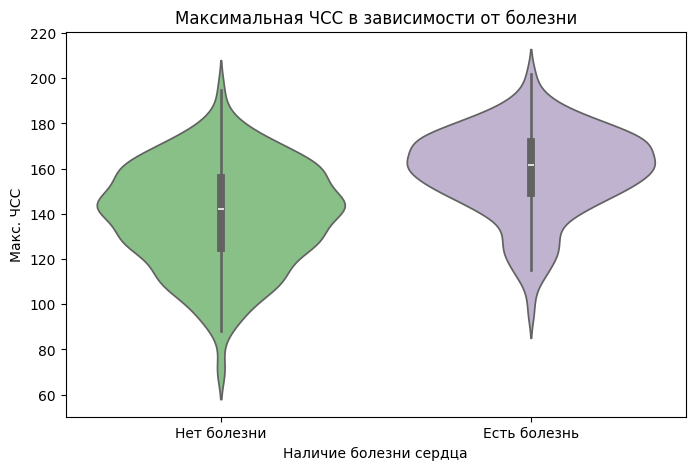

In [10]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='target', y='thalach', palette='Accent')
plt.title('Максимальная ЧСС в зависимости от болезни')
plt.xlabel('Наличие болезни сердца')
plt.ylabel('Макс. ЧСС')
plt.xticks([0, 1], ['Нет болезни', 'Есть болезнь'])
plt.show()


Пациенты с болезнью имеют, в среднем, более высокую максимальную частоту сердцебиения

## Тип боли в груди и диагноз (график №5)


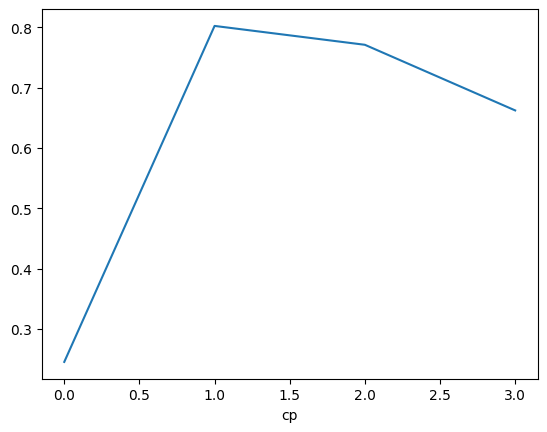

In [11]:
# Линейный график — неинформативен для категориальных данных
df.groupby('cp')['target'].mean().plot(kind='line')
plt.show()


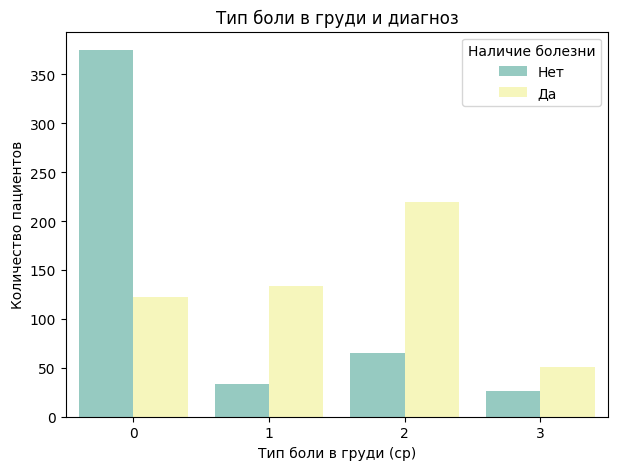

In [12]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='cp', hue='target', palette='Set3')
plt.title('Тип боли в груди и диагноз')
plt.xlabel('Тип боли в груди (cp)')
plt.ylabel('Количество пациентов')
plt.legend(title='Наличие болезни', labels=['Нет', 'Да'])
plt.show()


Тип боли в груди — один из наиболее важных факторов. Тип 0 (типичная стенокардия) чаще связан с отсутствием болезни, а тип 3 — наоборот.

## Итоговые выводы
Женщины имеют более высокий риск сердечного заболевания.

Уровень холестерина важен, но не определяющий — он варьируется сильно у всех групп.

Более высокая максимальная ЧСС связана с наличием болезни.

Тип боли в груди — мощный индикатор, его категоризация имеет смысл в клиническом анализе.

Холестерин у молодых пациентов также может быть тревожным сигналом.